Importation of modules and functions
===

In [20]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import datetime
import random
import warnings

# Functions
sys.path.insert(0, './implementations/')
from implementations import *
from preprocessing import *
from pca import *
from plot import *
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data loading
===

In [2]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")
(t_labels, t_data_raw, t_ids) = load_csv_data("data/test.csv")

Data filtering and standardization
===

In [3]:
X_train, y_train, X_test, y_test = split_data(data_raw, labels_raw)
X_train, X_test, y_train = process_data(X_train, X_test, y_train, ids_raw, sample_filtering = False, feature_filtering = False, replace = 'mean',remove_outlier = True)

X_train, means, variance = standardize(X_train)
X_test = standardize_test(X_test, means, variance)

The original dimensions of the training data set was 200000 samples and 30 columns
 After feature and sample filtering, there are 200000 samples and 30 columns


Build data into matrix form
===

In [4]:
y, tx = build_model_data(X_train, y_train)
y_t, tx_t = build_model_data(X_test,y_test)

Linear regression with gradient descent (GD)
===

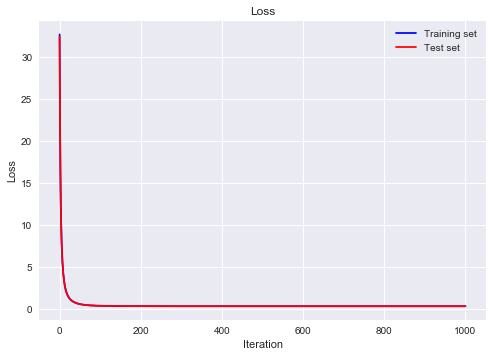

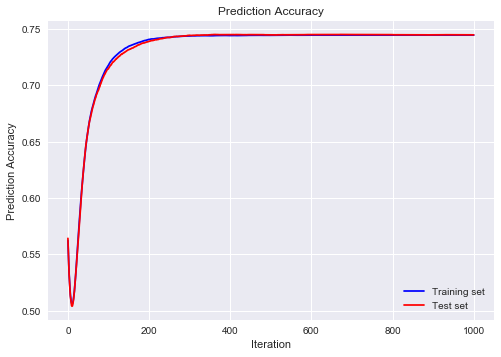

In [28]:
# Initialize w vector
initial_w = np.ones(tx.shape[1])

# Perform linear regression by gradient descent
loss_tr, loss_ts, acc_tr, acc_ts, ws = least_squares_GD(y, tx, y_t, tx_t, initial_w, gamma = 0.05, k=0, max_iters = 1000)

plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)


Linear regression with stochastic gradient descent (SGD)
===

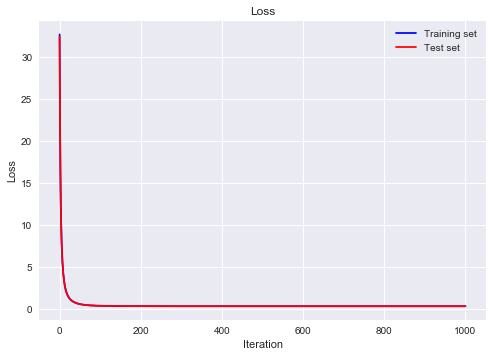

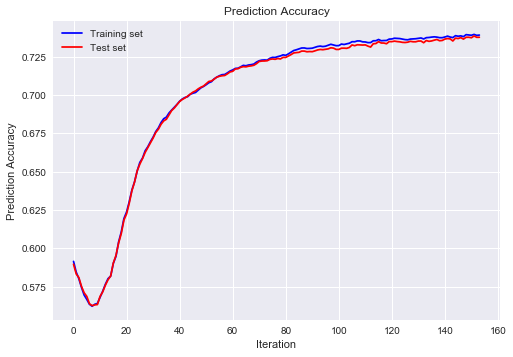

In [32]:
initial_w = np.random.rand(tx.shape[1])

# fit model, retrieve parameters ws
losses_tr, losses_ts, acc_tr, acc_ts, w = least_squares_SGD(y, tx, y_t, tx_t, initial_w, max_iters = 250, tol = 1e-4, patience = 5)

plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)


Linear regression using least squares normal equations
===

In [50]:
w = least_squares(y, tx, k =0)

train_pred_lab = predict_labels(w, tx)
acc_tr = pred_accuracy(train_pred_lab, y)

test_pred_lab = predict_labels(w, tx_t)
acc_ts = pred_accuracy(test_pred_lab, y_t)

loss_tr = np.sqrt(2 * compute_loss(y, tx, w))
loss_ts = np.sqrt(2 * compute_loss(y_t, tx_t, w))

print("train loss : {0} | test loss : {1}".format(loss_tr,loss_ts))
print("train accuracy : {0} \t | test accuracy : {1}".format(acc_tr,acc_ts))


train loss : 0.8258799168861621 | test loss : 0.8277984064985611
train accuracy : 0.744585 	 | test accuracy : 0.74496


Linear regression using the normal equations with additional polynomial degrees
===

In [ ]:
degrees = range(1,4)
rmse_tr = np.zeros(len(degrees))
rmse_ts = np.zeros(len(degrees))
pred_tr = np.zeros(len(degrees))
pred_ts = np.zeros(len(degrees))


for ind, degree in enumerate(degrees):
    #train the model
    tx_poly = build_poly(tx,degree)
    tx_t_poly = build_poly(tx_t,degree)
    
    w = least_squares(y, tx_poly)
    rmse_tr[ind] = (np.sqrt(2 * compute_loss(y, tx_poly, w)))
    pred_tr[ind] = pred_accuracy(predict_labels(w, tx_poly), y)
    
    #test the model
    
    rmse_ts[ind] = (np.sqrt(2 * compute_loss(y_t, tx_t_poly, w)))
    pred_ts[ind] = (pred_accuracy(predict_labels(w, tx_t_poly), y_t))
    
    # print the update
    print("degree: {d} \t rmse_ts: {a} \t  pred_ts: {b}".format(d = degree, a = rmse_ts[ind], b = pred_ts[ind]))

    

# plot the loss
plt.style.use('seaborn')
plt.plot(degrees,rmse_tr, c='blue')
plt.plot(degrees,rmse_ts, c='red')
plt.title('Loss')
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()


#plot the accuracy
plt.style.use('seaborn')
plt.plot(degrees,pred_tr, c='blue')
plt.plot(degrees,pred_ts, c='red')
plt.title('Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()


Linear regression using ridge regression
===

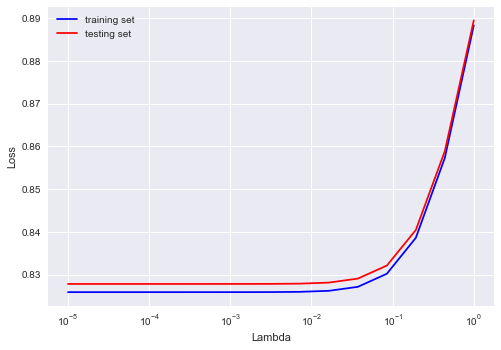

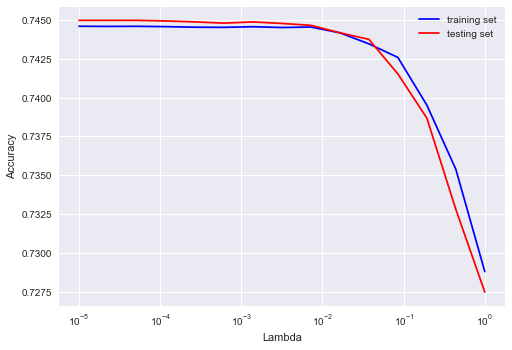

In [56]:
lambdas = np.logspace(-5, 0, 15)
rmse_tr = []
rmse_ts = []
pred_tr = []
pred_ts = []

for ind, lambda_ in enumerate(lambdas):
    
    w = ridge_regression(y, tx, lambda_)
    rmse_tr.append(np.sqrt(2 * compute_loss(y, tx, w)))
    pred_tr.append(pred_accuracy(predict_labels(w, tx),y))
    
    
    rmse_ts.append(np.sqrt(2 * compute_loss(y_t, tx_t, w)))
    pred_ts.append(pred_accuracy(predict_labels(w, tx_t),y_t))
    
plt.style.use('seaborn')
plt.semilogx(lambdas,rmse_tr, c='blue')
plt.semilogx(lambdas,rmse_ts, c='red')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred_tr, c='blue')
plt.semilogx(lambdas,pred_ts, c='red')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper right')
plt.show()

# print(np.max(pred))

# Logistic regression using gradient descent and stochastic gradient descent

## Gradient Descent


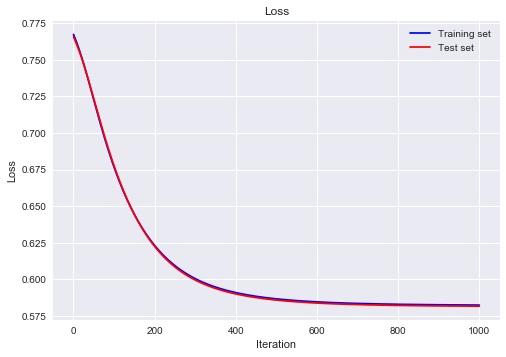

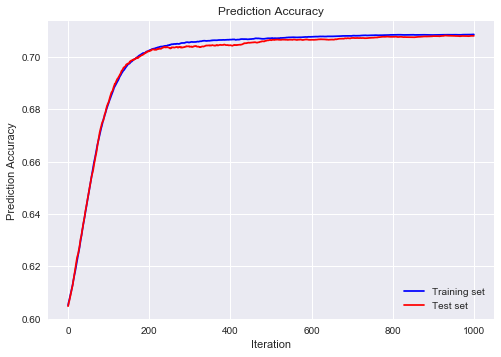

In [63]:
initial_w = np.random.rand(tx.shape[1])

# fit model, retrieve parameters ws
loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_regression(y, tx, y_t, tx_t, initial_w, method = 'gd', max_iters = 1000, gamma = 0.05) 


plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

### Stochastic Gradient Descent

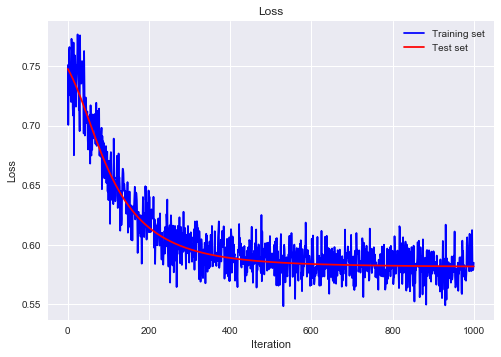

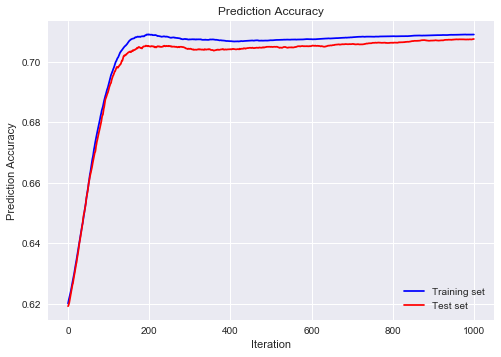

In [68]:
initial_w = np.random.rand(tx.shape[1])

# fit model, retrieve parameters ws
loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_regression(y, tx, y_t, tx_t, initial_w, method = 'sgd', max_iters = 1000, gamma = 0.05) 


plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

# Regularized Logistic Regression

ValueError: x and y must have same first dimension, but have shapes (11,) and (1001,)

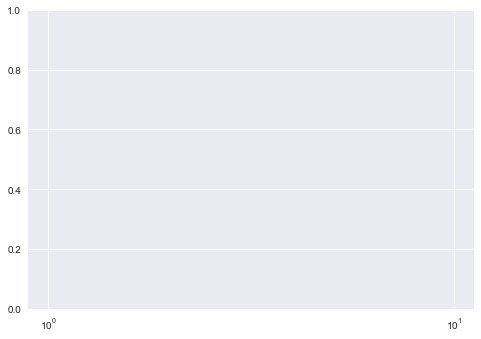

In [79]:
lambdas = np.logspace(-10,0, 11)
losses_tr = []
losses_ts = []
pred_tr = []
pred_ts = []
initial_w = np.random.rand(tx.shape[1])

# There is a runtime warning but just be patient

for ind, lambda_ in enumerate(lambdas):
    
    loss_tr, loss_ts, acc_tr, acc_ts, w = reg_logistic_regression(y, tx, y_t, tx_t, initial_w, lamb = lambda_, method ='gd', gamma = 0.0001, max_iters=1000)
    
    best_w = ws[-1]
    
    losses_tr.append(loss_tr[-1])
    pred_tr.append(acc_tr[-1])
    
    losses_ts.append(loss_ts[-1])
    pred_ts.append(acc_ts[-1])

    

plt.style.use('seaborn')
plt.semilogx(lambdas,losses_tr, c='blue')
plt.semilogx(lambdas,losses_ts, c='red')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred_tr, c='blue')
plt.semilogx(lambdas,pred_ts, c='red')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper right')
plt.show()
####


# Logistic regression using Newton's method

The Newton's Method helps us compute the logistic regression faster.
Note that the learning rate is increased and that this function has the lembda parameter that allows
it to be regularizer or not (lam =0)

25/200	 train acc : 0.66042 	 | test acc : 0.66186
50/200	 train acc : 0.715565 	 | test acc : 0.7137
75/200	 train acc : 0.734615 	 | test acc : 0.73446
100/200	 train acc : 0.741805 	 | test acc : 0.74116
125/200	 train acc : 0.74416 	 | test acc : 0.7437
150/200	 train acc : 0.744595 	 | test acc : 0.7449
175/200	 train acc : 0.745185 	 | test acc : 0.7451
200/200	 train acc : 0.745475 	 | test acc : 0.74554


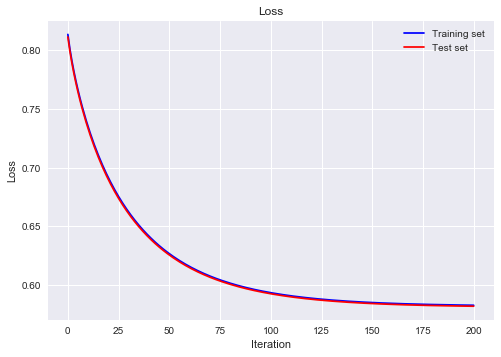

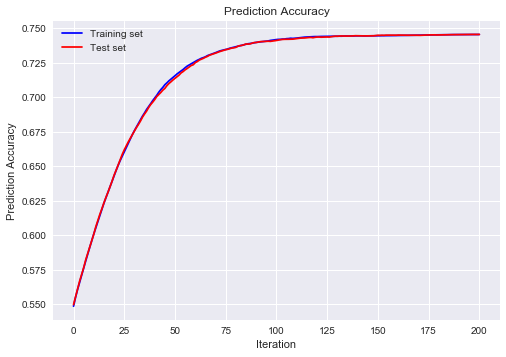

In [81]:
initial_w = np.random.rand(tx.shape[1])

loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_hessian(y, tx, y_t, tx_t, initial_w, gamma=5000, lam=1e-10, max_iters=200) 

plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

# Varying Learning Rate (gamma) with Logistic Regression

Learning rate : 500
25/150	 train acc : 0.579675 	 | test acc : 0.5789
50/150	 train acc : 0.59085 	 | test acc : 0.58978
75/150	 train acc : 0.602245 	 | test acc : 0.6011
100/150	 train acc : 0.613075 	 | test acc : 0.61122
125/150	 train acc : 0.623355 	 | test acc : 0.62236
150/150	 train acc : 0.63281 	 | test acc : 0.63124


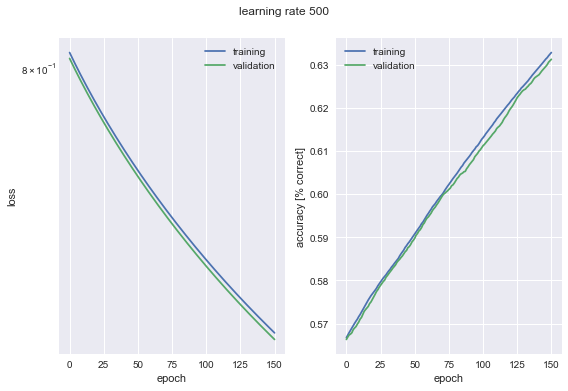

Learning rate : 1000
25/150	 train acc : 0.591055 	 | test acc : 0.5902
50/150	 train acc : 0.613365 	 | test acc : 0.6115
75/150	 train acc : 0.63316 	 | test acc : 0.6318
100/150	 train acc : 0.651575 	 | test acc : 0.65046
125/150	 train acc : 0.668855 	 | test acc : 0.66688
150/150	 train acc : 0.683055 	 | test acc : 0.68138


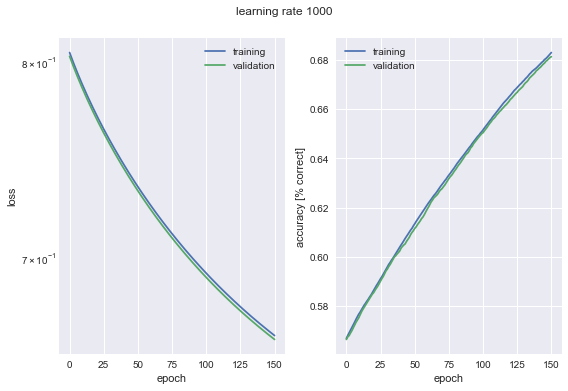

Learning rate : 5000
25/150	 train acc : 0.67196 	 | test acc : 0.67034
50/150	 train acc : 0.721405 	 | test acc : 0.72152
75/150	 train acc : 0.737975 	 | test acc : 0.73794
100/150	 train acc : 0.742755 	 | test acc : 0.74276
125/150	 train acc : 0.744485 	 | test acc : 0.7448
150/150	 train acc : 0.745005 	 | test acc : 0.7454


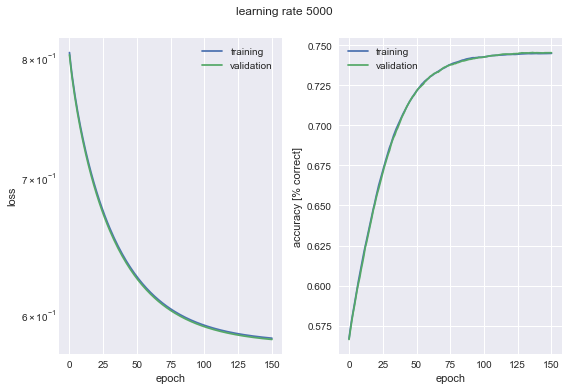

Learning rate : 10000
25/150	 train acc : 0.7238 	 | test acc : 0.72356
50/150	 train acc : 0.743115 	 | test acc : 0.74312
75/150	 train acc : 0.74501 	 | test acc : 0.74528
100/150	 train acc : 0.745515 	 | test acc : 0.74548
125/150	 train acc : 0.745505 	 | test acc : 0.74562
150/150	 train acc : 0.745495 	 | test acc : 0.74574


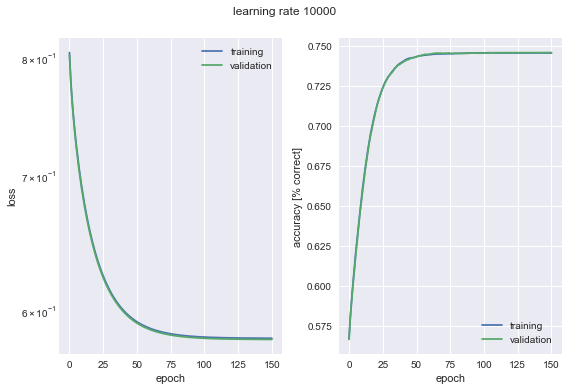

In [88]:
num_iter = 1000
lr = [500, 1000, 5000, 10000] 


initial_w = np.random.rand(tx.shape[1])

for i in range(len(lr)):
    print("Learning rate : {0}".format(lr[i]))
    loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_hessian(y, tx, y_t, tx_t, initial_w, gamma=lr[i], lam=1e-10, max_iters=150) 
    
    titre = "learning rate "+str(lr[i])
    plt.show(plotCurves(loss_tr, acc_tr, loss_ts, acc_ts, titre))


